In [1]:
import glob
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


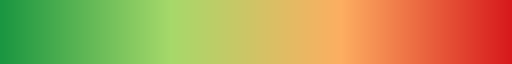

In [4]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230906_OAdilute_cuvette'
subfolder = glob.glob(cwd + '/**Tol**')
subfolder.sort()
# # del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230906_OAdilute_cuvette/Tol_00
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230906_OAdilute_cuvette/Tol_08
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230906_OAdilute_cuvette/Tol_16
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230906_OAdilute_cuvette/Tol_24


In [6]:
dilute_list = [os.path.basename(i) for i in subfolder]
dilute_list

['Tol_00', 'Tol_08', 'Tol_16', 'Tol_24']

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [7]:
df = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
integration_time = ['20ms']

for i in range(len(subfolder)):
    for j in range(len(integration_time)):
        data_files = glob.glob(subfolder[i] + f'/**{integration_time[j]}**Subt**')
        data_files.sort()
        # del data_files[0]
        # suffix = os.path.basename(subfolder_PL[i])
        suffix = dilute_list[i] + '_' + integration_time[j]
        # id0 = 8
        # id1 = 22

        skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
        df_int = pd.DataFrame()
        df_temp = pd.DataFrame()

        for k in range(len(data_files)):        
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)

        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df[f'x_{suffix}'] = df_int['Wavelength']
        df[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

## Export PL of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [8]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df.to_csv('20230829_CsPbBr_PL.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [9]:
df

x_Tol_00_20ms  Tol_00_20ms_mean  x_Tol_08_20ms  Tol_08_20ms_mean  \
0           197.742          0.022222        197.742          0.198889   
1           198.544         -0.143333        198.544          0.131111   
2           199.347         -0.162222        199.347          0.151111   
3           200.149          0.033333        200.149          0.416667   
4           200.951          0.148889        200.951          0.495556   
...             ...               ...            ...               ...   
1039        990.770          0.197778        990.770          0.067778   
1040        991.489          0.136667        991.489         -0.010000   
1041        992.208          0.130000        992.208         -0.032222   
1042        992.928         -0.071111        992.928         -0.195556   
1043        993.647         -0.022222        993.647         -0.198889   

      x_Tol_16_20ms  Tol_16_20ms_mean  x_Tol_24_20ms  Tol_24_20ms_mean  
0           197.742         -0.023333        197.742         -0.016667  
1           198.544         -0.093333        198.544         -0.116667  
2           199.347         -0.024444        199.347         -0.037778  
3           200.149          0.167778        200.149          0.228889  
4           200.951          0.291111        200.951          0.353333  
...             ...               ...            ...               ...  
1039        990.770          0.320000        990.770          0.341111  
1040        991.489          0.273333        991.489          0.254444  
1041        992.208          0.217778        992.208          0.215556  
1042        992.928          0.042222        992.928          0.005556  
1043        993.647          0.023333        993.647          0.015556  

[1044 rows x 8 columns]

## Check data in pd dataframe

In [10]:
df.keys()

Index(['x_Tol_00_20ms', 'Tol_00_20ms_mean', 'x_Tol_08_20ms',
       'Tol_08_20ms_mean', 'x_Tol_16_20ms', 'Tol_16_20ms_mean',
       'x_Tol_24_20ms', 'Tol_24_20ms_mean'],
      dtype='object')

In [11]:
df.shape

(1044, 8)

## Prepare keys for average scans in pd dataframe

In [12]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_Tol_00_20ms',
 'Tol_00_20ms_mean',
 'x_Tol_08_20ms',
 'Tol_08_20ms_mean',
 'x_Tol_16_20ms',
 'Tol_16_20ms_mean',
 'x_Tol_24_20ms',
 'Tol_24_20ms_mean']

In [13]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Tol_00_20ms_mean
Tol_08_20ms_mean
Tol_16_20ms_mean
Tol_24_20ms_mean


## Plot all PL scans together

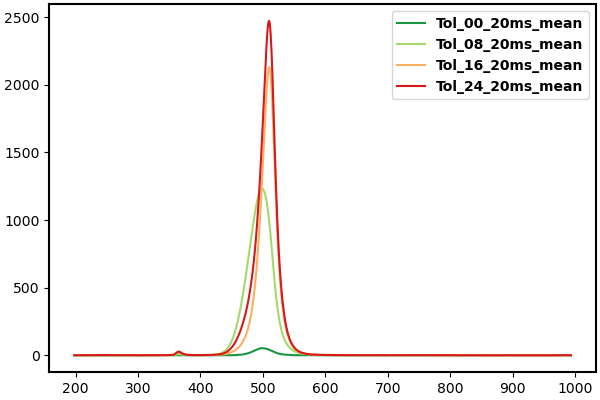

In [14]:
f1, ax1 = plt.subplots(1, 1, figsize = (6, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 23

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    # t = re.findall(r'\d+', title[i])[-1]
    ax1.plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])
        
legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)
# ax1[1].legend(prop=legend_properties)

# ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

# ax1.axvline(w0)
# ax1.axvline(w1)

## Create new folder "plqy" for saving data

In [15]:
new_dir = cwd + '/plqy'

try:
    os.mkdir(new_dir)
except FileExistsError:
    pass

# if os.path.exists(new_dir):
#     pass
# else:
#     os.mkdir(new_dir)

## Integrate peak area

In [16]:
simpson_int = []
for i in range(len(title)):
    x = df[keys_list[i*2]][idx_w0:idx_w1]
    y = df[keys_list[i*2+1]][idx_w0:idx_w1]
    simpson_int.append(integrate.simpson(y, x))

df_int = pd.DataFrame()
df_int['Data_source'] = [title[i] for i in range(len(title))]
df_int['Simpson_integrate'] = simpson_int
df_int

Data_source  Simpson_integrate
0  Tol_00_20ms_mean        1997.895746
1  Tol_08_20ms_mean       59178.991403
2  Tol_16_20ms_mean       66279.297201
3  Tol_24_20ms_mean       82642.019849

## Save Simpson integrate of PL peak

In [17]:
# df_int.to_csv(os.path.join(new_dir, 'CsPbBr_OAdilute_simpson_integrate.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [18]:
# df_int.to_csv('CsPbBr_OAdilute_simpson_integrate.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Absorbance

### Read Abs data into pandas dataframe

In [19]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df2 = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
integration_time = ['20ms']

for i in range(len(subfolder)):
    for j in range(len(integration_time)):
        # data_files = subfolder
        data_files = glob.glob(subfolder[i] + f'/**{integration_time[j]}**Absorbance**')
        data_files.sort()
        # del data_files[0]
        # suffix = os.path.basename(subfolder_PL[i])
        suffix = dilute_list[i] + '_' + integration_time[j]
        # id0 = 8
        # id1 = 22

        skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
        df_int = pd.DataFrame()
        df_temp = pd.DataFrame()

        for k in range(len(data_files)):        
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'Abs_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'Abs_{k:03d}']], axis=1, ignore_index=False)
        
        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df2[f'x_{suffix}'] = df_int['Wavelength']
        df2[f'{suffix}_mean'] = df_temp.mean(axis=1)


## Export Absorbance of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [20]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df2.to_csv('20230829_CsPbBr_abs.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [21]:
df2

x_Tol_00_20ms  Tol_00_20ms_mean  x_Tol_08_20ms  Tol_08_20ms_mean  \
0           197.742          0.010000        197.742         -0.043333   
1           198.544          0.023333        198.544          0.022222   
2           199.347          0.016667        199.347          0.021111   
3           200.149          0.016667        200.149          0.020000   
4           200.951          0.015556        200.951          0.020000   
...             ...               ...            ...               ...   
1039        990.770          0.000000        990.770          0.000000   
1040        991.489          0.000000        991.489          0.000000   
1041        992.208          0.000000        992.208          0.000000   
1042        992.928          0.000000        992.928          0.000000   
1043        993.647          0.010000        993.647         -0.043333   

      x_Tol_16_20ms  Tol_16_20ms_mean  x_Tol_24_20ms  Tol_24_20ms_mean  
0           197.742         -0.051111        197.742         -0.047273  
1           198.544          0.013333        198.544          0.004545  
2           199.347          0.010000        199.347          0.002727  
3           200.149          0.010000        200.149          0.003636  
4           200.951          0.010000        200.951          0.000909  
...             ...               ...            ...               ...  
1039        990.770         -0.010000        990.770         -0.010000  
1040        991.489         -0.010000        991.489         -0.010000  
1041        992.208         -0.010000        992.208         -0.010000  
1042        992.928         -0.010000        992.928         -0.010000  
1043        993.647         -0.051111        993.647         -0.047273  

[1044 rows x 8 columns]

## Prepare keys for average scans in pd dataframe

In [22]:
keys_list2 = list(df2.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_Tol_00_20ms',
 'Tol_00_20ms_mean',
 'x_Tol_08_20ms',
 'Tol_08_20ms_mean',
 'x_Tol_16_20ms',
 'Tol_16_20ms_mean',
 'x_Tol_24_20ms',
 'Tol_24_20ms_mean']

In [23]:
# title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
title = keys_list2[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Tol_00_20ms_mean
Tol_08_20ms_mean
Tol_16_20ms_mean
Tol_24_20ms_mean


## Plot all Abs scans together

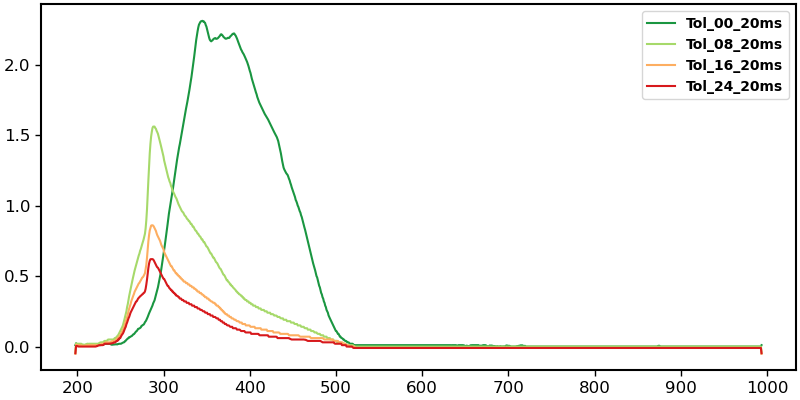

In [24]:
f2, ax2 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax2.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

# ax2.set_xlim(-0.5, 20)
# ax2.set_ylim(2500, 9500)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Try linear fitting

In [25]:
def line_2D(x, slope, y_intercept):
    y = x*slope + y_intercept
    return y


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def fit_line_2D(x, y, fit_function, x_range=[500, 900], maxfev=10000, plot=True):
    x = np.asarray(x)
    y = np.asarray(y)
    y = np.nan_to_num(y, nan=0)
    
    try:        
        idx0, _ = find_nearest(x, x_range[0])
        idx1, _ = find_nearest(x, x_range[1])
    except (TypeError, IndexError):
        idx0 = 0
        idx1 = -1
    
    slope = (y[idx1]-y[idx0]) / (x[idx1]-x[idx0])
    y_intercept = np.mean(y[idx0:idx1])
    
    try:
        initial_guess = [slope, y_intercept]
    except (TypeError, IndexError):
        initial_guess = [0.01, 0]
    
    try:
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
    except RuntimeError:
        maxfev=1000000
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
        
    if plot:
        plt.figure()
        plt.plot(x, y, label='data')
        plt.plot(x, fit_function(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        plt.legend()
    
    return popt, pcov


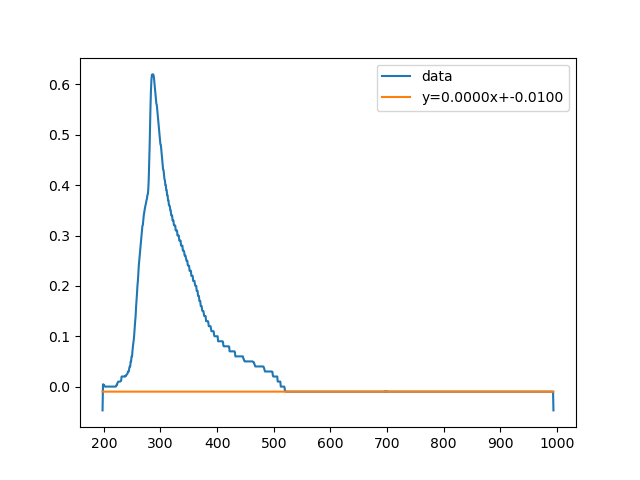

In [26]:
x = df2[keys_list2[-2]]
y = df2[keys_list2[-1]]
x_range=[700, 900]
idx0, v0 = find_nearest(x, x_range[0])
idx1, v1 = find_nearest(x, x_range[1])
popt, pcov = fit_line_2D(x,y,line_2D, x_range=[700, 900])

In [27]:
# title.append('dummy')
# title

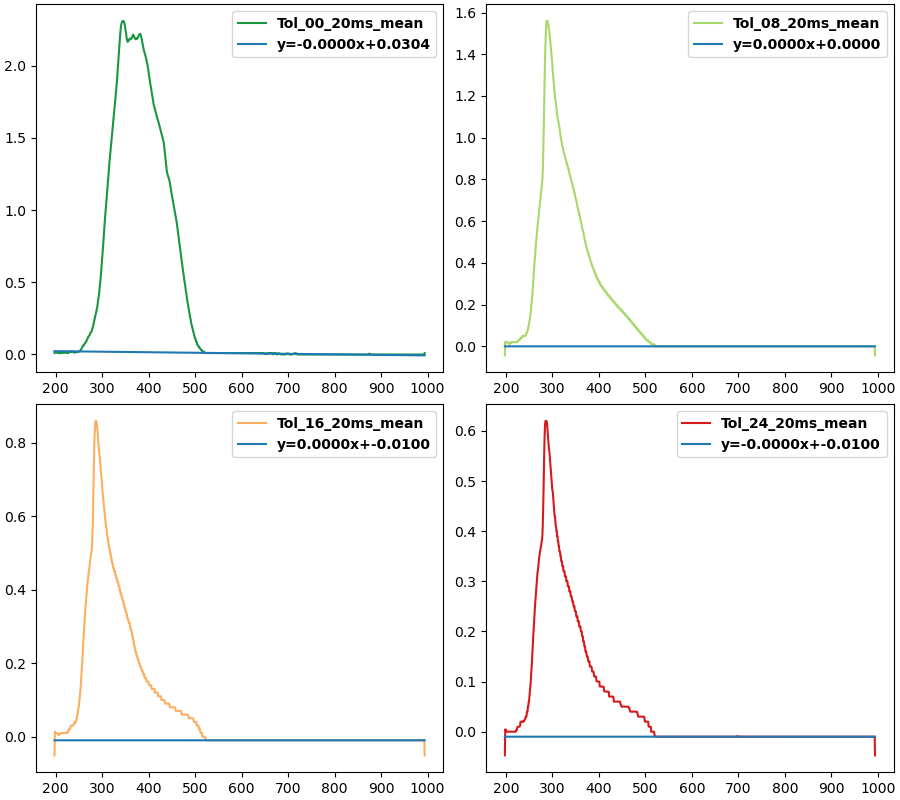

In [28]:
rows = 2
cols = 2
f3, ax3 = plt.subplots(rows, cols, figsize = (9, 8), constrained_layout=True)

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22
x_range_list = [[600, 900], [600, 900], 
                [600, 900], [600, 900], 
                [400, 900], [800, 900],
               ]

legend_properties = {'weight':'bold', 'size':10}
df4 = pd.DataFrame()
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    try:
        x = df2[keys_list2[i*2]]
        y = df2[keys_list2[i*2+1]]
        popt, pcov = fit_line_2D(x, y, line_2D, x_range=x_range_list[0], plot=False)
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, y, color=cmap(color_idx[i]), label=label[i][:id1])
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, line_2D(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        ax3[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
        df4[keys_list2[i*2]] = x
        # df4[keys_list2[i*2+1]] = y - popt[1]
        df4[keys_list2[i*2+1]] = y - line_2D(x, *popt)
    
    except (KeyError, IndexError):
        pass

# # ax3.set_xlim(-0.5, 20)
# # ax3.set_ylim(2500, 9500)
# # ax3.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# # ax3.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax3.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax3.spines["bottom"].set_linewidth(spinewidth)
# ax3.spines["right"].set_linewidth(spinewidth)
# ax3.spines["top"].set_linewidth(spinewidth)
# ax3.spines["left"].set_linewidth(spinewidth)

In [29]:
title = keys_list2[1::2]
title

['Tol_00_20ms_mean',
 'Tol_08_20ms_mean',
 'Tol_16_20ms_mean',
 'Tol_24_20ms_mean']

## Plot Abs by offset

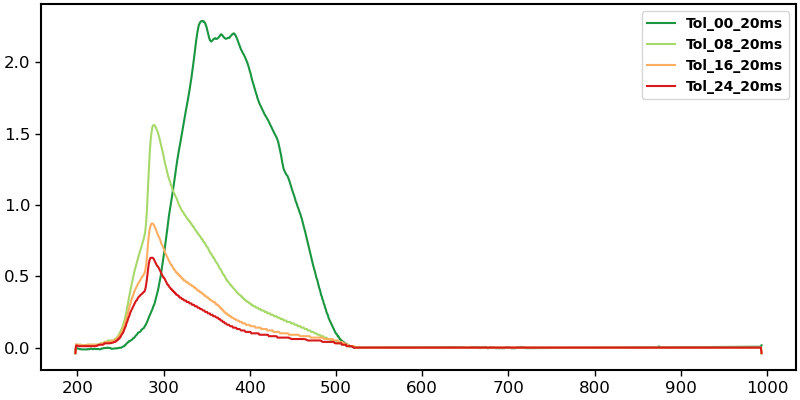

In [30]:
f4, ax4 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax4.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax4.plot(df4[keys_list2[i*2]], df4[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

# ax4.set_xlim(-0.5, 20)
# ax4.set_ylim(2500, 9500)
# ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for offset data in pd dataframe

In [31]:
keys_list4 = list(df4.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list4

['x_Tol_00_20ms',
 'Tol_00_20ms_mean',
 'x_Tol_08_20ms',
 'Tol_08_20ms_mean',
 'x_Tol_16_20ms',
 'Tol_16_20ms_mean',
 'x_Tol_24_20ms',
 'Tol_24_20ms_mean']

## Save offset data as csv

In [32]:
for i in range(len(title)):
    df_temp = pd.DataFrame()
    df_temp['Wavelength'] = df4[keys_list4[i*2]].fillna(0)
    df_temp['Absorbance'] = df4[keys_list4[i*2+1]].fillna(0)
    fn = title[i][:id1] + '_offset.csv'
    print(fn)
    # df_temp.to_csv(os.path.join(new_dir, fn), index=False, sep=',', float_format='{:.8e}'.format)

Tol_00_20ms_offset.csv
Tol_08_20ms_offset.csv
Tol_16_20ms_offset.csv
Tol_24_20ms_offset.csv


## Save Absorbance at 365 nm

In [33]:
idx_365, w365 = find_nearest(df4[keys_list2[0]], 365)
# df4.iloc[idx_365][::-2][::-1].to_list()

df_365 = pd.DataFrame()
df_365['Data_source'] = [title[i] for i in range(len(title))]
df_365['Abs_365'] = df2.iloc[idx_365][1::2].to_list()
df_365['Abs_offset_365'] = df4.iloc[idx_365][1::2].to_list()
df_365

Data_source  Abs_365  Abs_offset_365
0  Tol_00_20ms_mean     2.20        2.183032
1  Tol_08_20ms_mean     0.56        0.560000
2  Tol_16_20ms_mean     0.28        0.290000
3  Tol_24_20ms_mean     0.19        0.199983

In [34]:
# df_365.to_csv(os.path.join(new_dir, 'CsPbBr_OAdilute_abs_365.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [35]:
# df_365.to_csv('CsPbBr_OAdilute_abs_365.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [36]:
df2.keys()

Index(['x_Tol_00_20ms', 'Tol_00_20ms_mean', 'x_Tol_08_20ms',
       'Tol_08_20ms_mean', 'x_Tol_16_20ms', 'Tol_16_20ms_mean',
       'x_Tol_24_20ms', 'Tol_24_20ms_mean'],
      dtype='object')

## Import analysis functions

In [37]:
%run -i /Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py

## Gaussian peak fittimg

In [38]:
# keys_list.append('x_dummy')
# keys_list.append('dummy')
keys_list

['x_Tol_00_20ms',
 'Tol_00_20ms_mean',
 'x_Tol_08_20ms',
 'Tol_08_20ms_mean',
 'x_Tol_16_20ms',
 'Tol_16_20ms_mean',
 'x_Tol_24_20ms',
 'Tol_24_20ms_mean']

x_Tol_00_20ms passes c1 so is good.

** Average of Tol_00_20ms_mean has peaks at [127]**


** start to do peak fitting by Gaussian**

x_Tol_08_20ms passes c1 so is good.

** Average of Tol_08_20ms_mean has peaks at [126]**


** start to do peak fitting by Gaussian**

x_Tol_16_20ms passes c1 so is good.

** Average of Tol_16_20ms_mean has peaks at [141]**


** start to do peak fitting by Gaussian**

x_Tol_24_20ms passes c1 so is good.

** Average of Tol_24_20ms_mean has peaks at [141]**


** start to do peak fitting by Gaussian**



/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py:83: RuntimeWarning: invalid value encountered in double_scalars
  r_sq = 1 - (ss_res / ss_tot)


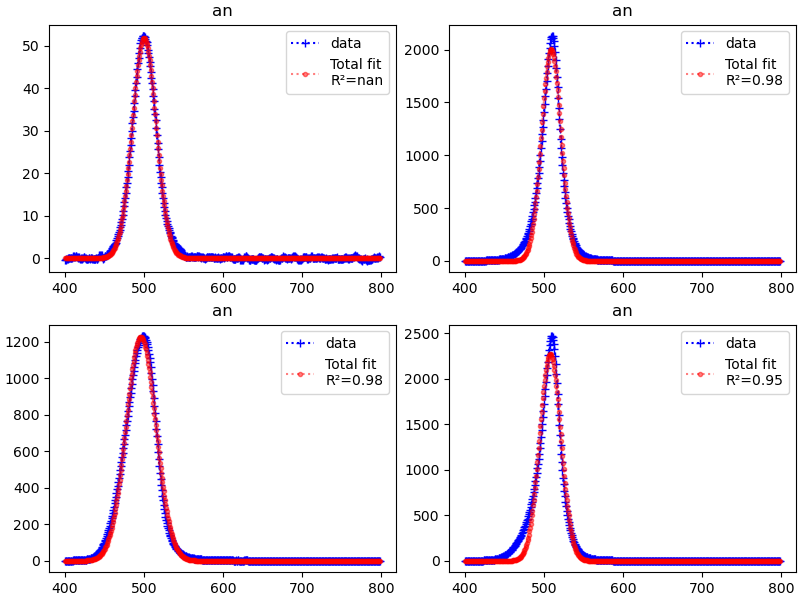

In [39]:
rows = 2
cols = 2
f5, ax5 = plt.subplots(rows, cols, figsize = (8, 6), constrained_layout=True)
# ax4 = ax4.flatten()
wl1 = 400
wl2 = 800
idx1, w1 = find_nearest(df[keys_list[0]], wl1)
idx2, w2 = find_nearest(df[keys_list[0]], wl2)

key_x_reshape = np.asarray(keys_list[0::2]).reshape(cols, rows).T
key_y_reshape = np.asarray(keys_list[1::2]).reshape(cols, rows).T

peak_list = []
fwhm = []
simpson_int = []

for i in range(cols):
    for j in range(rows):
        #i = 4
        try:
            x0 = df[key_x_reshape[j][i]][idx1:idx2].to_numpy()
            y0 = df[key_y_reshape[j][i]][idx1:idx2].to_numpy()
            #_2peak_fit_PL(x,y, distr='G', height=1000, second_peak=-4, plot=True, plot_title=os.path.basename(subfolder[i]))

            peak, prop = good_bad_data(x0, y0, key_height=50, data_id = f'{key_x_reshape[j][i]}', distance=20, height=50)
            x, y, p, f, popt = _fitting_in_kafka(x0, y0, f'{key_y_reshape[j][i]}', peak, prop)  


            simpson_int.append(integrate.simpson(y,x))
            peak_list.append(popt[1])
            fwhm.append(2.355*popt[2])


            fitted_result = f(x, *popt)
            r_2 = r_square(x, y, fitted_result)
            r2 = f'R\u00b2={r_2:.2f}'
            ax5[j][i].set_title(key_y_reshape[j][i][14:27])
            ax5[j][i].plot(x,y,'b+:',label='data')
            ax5[j][i].plot(x,fitted_result,'ro:',label='Total fit\n'+r2, alpha=0.5, markersize=3)

        #     # peak 1
        #     peak_1 = _1gauss(x, *popt[0:3])
        #     ax4[i].plot(x, peak_1, "g", label='peak 1')
        #     ax4[i].fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)

        #     # peak 2
        #     peak_2 = _1gauss(x, *popt[3:6])
        #     ax4[i].plot(x, peak_2, "y", label='peak 2')
        #     ax4[i].fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)

            ax5[j][i].legend()
        
        except (KeyError, IndexError):
            pass

In [40]:
simpson_int

[1998.7812344689448, 59191.13169432135, 66294.96639700118, 82656.20563006864]

## Plot PE, FWHM, PLQY

In [41]:
def plqy_quinine(absorbance_sample, PL_integral_sample, refractive_index_solvent, 
                     absorbance_reference, PL_integral_reference, refractive_index_reference, plqy_reference):
    
    integral_ratio = PL_integral_sample / PL_integral_reference
    absorbance_ratio = absorbance_reference / absorbance_sample
    refractive_index_ratio = (refractive_index_solvent / refractive_index_reference)**2

    plqy = plqy_reference * integral_ratio * absorbance_ratio * refractive_index_ratio
    return plqy

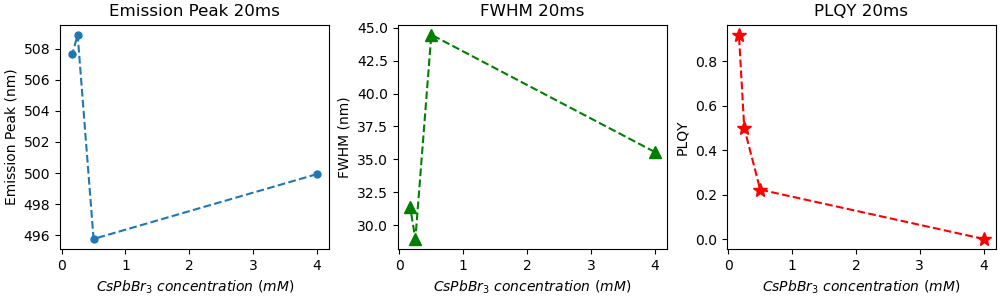

In [42]:
# abs_365 = df11.iloc[210][1::2].to_numpy()
abs_365 = df_365['Abs_365']

abs_365_r = 0.32
plqy_r = 0.546
ref_idx_toluene = 1.506
ref_idx_H2SO4 = 1.337
integral_r = 105001.159609
integral_pqds = np.asarray(simpson_int)

plqy = plqy_quinine(abs_365, integral_pqds, 1.506, abs_365_r, integral_r, 1.337, 0.546)
# plqy_4000ms = plqy_quinine(abs_365, integral_pqds[1::2], 1.506, abs_365_r, integral_r[1], 1.337, 0.546)
    

dilute_constant = np.asarray([1,8,16,24])
x_list = 4 / dilute_constant
# x_list_T = np.asarray(x_list).reshape(cols, rows).T
# peak_list_T = np.asarray(peak_list).reshape(cols, rows).T
# fwhm_T = np.asarray(fwhm).reshape(cols, rows).T
# plqy_T = np.asarray(plqy).reshape(cols, rows).T

rows = 1
cols = 3
integration_time = ['20ms']

f5, ax5 = plt.subplots(rows, cols, figsize = (10, 3), constrained_layout=True)
# for i in range(rows):
ax5[0].set_title(f'Emission Peak {integration_time[0]}')
ax5[0].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[0].set_ylabel('Emission Peak (nm)')
ax5[1].set_title(f'FWHM {integration_time[0]}')
ax5[1].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[1].set_ylabel('FWHM (nm)')
ax5[2].set_title(f'PLQY {integration_time[0]}')
ax5[2].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[2].set_ylabel('PLQY')


ax5[0].plot(x_list, peak_list, '.--', markersize=10)
ax5[1].plot(x_list, fwhm, 'g^--', markersize=8)
ax5[2].plot(x_list, plqy, 'r*--', markersize=10)

In [43]:
plqy

0    0.001918
1    0.223154
2    0.499871
3    0.918454
Name: Abs_365, dtype: float64